In [50]:

import gc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [51]:
import sns as sns

df = pd.read_csv("input.csv")
df.head()
print(df.shape)

(5004, 6)


In [52]:
df.keys()

Index(['id', 'from', 'to', 'cc', 'subject', 'date'], dtype='object')

In [53]:
round(df.isnull().sum()*100/df.shape[0],2).sort_values(ascending=False).head(20)

cc         56.12
subject     2.72
to          0.14
id          0.00
from        0.00
date        0.00
dtype: float64

In [54]:
df["cc_count"] = ''
df.head()


,id,from,to,cc,subject,date,cc_count
0,1,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование заявки на опл��ту ...,Fri 1 Apr 2022 10:07:02 +0300,
1,2,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Kulakov Dmitry <dk@sawatzky.ru>| Kalinovsky Ro...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru...,Отчет БЦ Павловский 01.04.2022 г.,Fri 1 Apr 2022 06:52:22 +0000,
2,3,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Roman Vinogradov VTV GROUP LLC <vinogradov@vtv...,vandakurova@vtv-group.ru <vandakurova@vtv-grou...,PV изменение объема услуг,Thu 31 Mar 2022 12:11:02 +0000,
3,4,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование электронной служеб...,Thu 24 Mar 2022 14:15:12 +0300,
4,5,corp.autoreply@ntvplus.com <corp.autoreply@ntv...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru>,NaN,Автоматический ответ: обновление модулей НТВ-ПЛЮС,Fri 11 Feb 2022 09:52:00 +0000,


In [56]:
def count_cc(row):
    if str(row["cc"]) == "nan":
        return 0
    else:
        return len(str(row["cc"]).split("|"))

df["cc_count"] = df.apply(lambda row: count_cc(row), axis=1)

df.head()

,id,from,to,cc,subject,date,cc_count
0,1,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование заявки на опл��ту ...,Fri 1 Apr 2022 10:07:02 +0300,0
1,2,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Kulakov Dmitry <dk@sawatzky.ru>| Kalinovsky Ro...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru...,Отчет БЦ Павловский 01.04.2022 г.,Fri 1 Apr 2022 06:52:22 +0000,2
2,3,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Roman Vinogradov VTV GROUP LLC <vinogradov@vtv...,vandakurova@vtv-group.ru <vandakurova@vtv-grou...,PV изменение объема услуг,Thu 31 Mar 2022 12:11:02 +0000,3
3,4,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование электронной служеб...,Thu 24 Mar 2022 14:15:12 +0300,0
4,5,corp.autoreply@ntvplus.com <corp.autoreply@ntv...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru>,NaN,Автоматический ответ: обновление модулей НТВ-ПЛЮС,Fri 11 Feb 2022 09:52:00 +0000,0


In [63]:
df["from_count"] = ''

def count_from(row):
        return len(row["from"].split("|"))

df["from_count"] = df.apply(lambda row: count_from(row), axis=1)

df.head()

,id,from,to,cc,subject,date,cc_count,from_count
0,1,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование заявки на опл��ту ...,Fri 1 Apr 2022 10:07:02 +0300,0,1
1,2,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Kulakov Dmitry <dk@sawatzky.ru>| Kalinovsky Ro...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru...,Отчет БЦ Павловский 01.04.2022 г.,Fri 1 Apr 2022 06:52:22 +0000,2,1
2,3,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Roman Vinogradov VTV GROUP LLC <vinogradov@vtv...,vandakurova@vtv-group.ru <vandakurova@vtv-grou...,PV изменение объема услуг,Thu 31 Mar 2022 12:11:02 +0000,3,1
3,4,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование электронной служеб...,Thu 24 Mar 2022 14:15:12 +0300,0,1
4,5,corp.autoreply@ntvplus.com <corp.autoreply@ntv...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru>,NaN,Автоматический ответ: обновление модулей НТВ-ПЛЮС,Fri 11 Feb 2022 09:52:00 +0000,0,1


In [65]:
df["to_count"] = ''

def count_to(row):
        return len(str(row["to"]).split("|"))

df["to_count"] = df.apply(lambda row: count_to(row), axis=1)

df.head()

,id,from,to,cc,subject,date,cc_count,from_count,to_count
0,1,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование заявки на опл��ту ...,Fri 1 Apr 2022 10:07:02 +0300,0,1,1
1,2,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Kulakov Dmitry <dk@sawatzky.ru>| Kalinovsky Ro...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru...,Отчет БЦ Павловский 01.04.2022 г.,Fri 1 Apr 2022 06:52:22 +0000,2,1,2
2,3,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Roman Vinogradov VTV GROUP LLC <vinogradov@vtv...,vandakurova@vtv-group.ru <vandakurova@vtv-grou...,PV изменение объема услуг,Thu 31 Mar 2022 12:11:02 +0000,3,1,1
3,4,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование электронной служеб...,Thu 24 Mar 2022 14:15:12 +0300,0,1,1
4,5,corp.autoreply@ntvplus.com <corp.autoreply@ntv...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru>,NaN,Автоматический ответ: обновление модулей НТВ-ПЛЮС,Fri 11 Feb 2022 09:52:00 +0000,0,1,1


In [67]:
df["numbers_in_subject"] = ''

def count_numbers(row):
    return sum(c.isdigit() for c in str(row["subject"]))

df["numbers_in_subject"] = df.apply(lambda row: count_numbers(row), axis=1)

df.head()

,id,from,to,cc,subject,date,cc_count,from_count,to_count,numbers_in_subject
0,1,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование заявки на опл��ту ...,Fri 1 Apr 2022 10:07:02 +0300,0,1,1,10
1,2,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Kulakov Dmitry <dk@sawatzky.ru>| Kalinovsky Ro...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru...,Отчет БЦ Павловский 01.04.2022 г.,Fri 1 Apr 2022 06:52:22 +0000,2,1,2,8
2,3,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Roman Vinogradov VTV GROUP LLC <vinogradov@vtv...,vandakurova@vtv-group.ru <vandakurova@vtv-grou...,PV изменение объема услуг,Thu 31 Mar 2022 12:11:02 +0000,3,1,1,0
3,4,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование электронной служеб...,Thu 24 Mar 2022 14:15:12 +0300,0,1,1,9
4,5,corp.autoreply@ntvplus.com <corp.autoreply@ntv...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru>,NaN,Автоматический ответ: обновление модулей НТВ-ПЛЮС,Fri 11 Feb 2022 09:52:00 +0000,0,1,1,0


In [68]:
df["subject_size"] = ''

def subject_size(row):
    return len(str(row["subject"]))

df["subject_size"] = df.apply(lambda row: subject_size(row), axis=1)

df.head()

,id,from,to,cc,subject,date,cc_count,from_count,to_count,numbers_in_subject,subject_size
0,1,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование заявки на опл��ту ...,Fri 1 Apr 2022 10:07:02 +0300,0,1,1,10,66
1,2,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Kulakov Dmitry <dk@sawatzky.ru>| Kalinovsky Ro...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru...,Отчет БЦ Павловский 01.04.2022 г.,Fri 1 Apr 2022 06:52:22 +0000,2,1,2,8,34
2,3,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Roman Vinogradov VTV GROUP LLC <vinogradov@vtv...,vandakurova@vtv-group.ru <vandakurova@vtv-grou...,PV изменение объема услуг,Thu 31 Mar 2022 12:11:02 +0000,3,1,1,0,25
3,4,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование электронной служеб...,Thu 24 Mar 2022 14:15:12 +0300,0,1,1,9,86
4,5,corp.autoreply@ntvplus.com <corp.autoreply@ntv...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru>,NaN,Автоматический ответ: обновление модулей НТВ-ПЛЮС,Fri 11 Feb 2022 09:52:00 +0000,0,1,1,0,49


DictNotFoundError: Dictionary for language 'ru_RU' could not be found
Please check https://pyenchant.github.io/pyenchant/ for details

In [72]:
df["subject_special_chars"] = ''

def count_special_chars(row):
    return sum((not c.isdigit() and not c.isalpha() and not c.isspace()) for c in str(row["subject"]))

df["subject_special_chars"] = df.apply(lambda row: count_special_chars(row), axis=1)

df.head()

,id,from,to,cc,subject,date,cc_count,from_count,to_count,numbers_in_subject,subject_size,subject_special_chars
0,1,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование заявки на опл��ту ...,Fri 1 Apr 2022 10:07:02 +0300,0,1,1,10,66,6
1,2,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Kulakov Dmitry <dk@sawatzky.ru>| Kalinovsky Ro...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru...,Отчет БЦ Павловский 01.04.2022 г.,Fri 1 Apr 2022 06:52:22 +0000,2,1,2,8,34,3
2,3,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Roman Vinogradov VTV GROUP LLC <vinogradov@vtv...,vandakurova@vtv-group.ru <vandakurova@vtv-grou...,PV изменение объема услуг,Thu 31 Mar 2022 12:11:02 +0000,3,1,1,0,25,0
3,4,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование электронной служеб...,Thu 24 Mar 2022 14:15:12 +0300,0,1,1,9,86,5
4,5,corp.autoreply@ntvplus.com <corp.autoreply@ntv...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru>,NaN,Автоматический ответ: обновление модулей НТВ-ПЛЮС,Fri 11 Feb 2022 09:52:00 +0000,0,1,1,0,49,2


In [74]:
numerical_features = df[["cc_count", "from_count", "to_count", "numbers_in_subject", "subject_size", "subject_special_chars"]]
numerical_features = (numerical_features - numerical_features.mean()) / (numerical_features.max() - numerical_features.min())
numerical_features.head()

,cc_count,from_count,to_count,numbers_in_subject,subject_size,subject_special_chars
0,-0.016207,-0.001599,-0.002220,0.237772,0.169154,0.322404
1,0.005771,-0.001599,-0.001324,0.175272,-0.009617,0.091634
2,0.016760,-0.001599,-0.002220,-0.074728,-0.059896,-0.139135
3,-0.016207,-0.001599,-0.002220,0.206522,0.280886,0.245481
4,-0.016207,-0.001599,-0.002220,-0.074728,0.074182,0.014711


In [76]:
from sklearn.cluster import KMeans
from sklearn import metrics

def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

for i in range(2, 10):
    s, dbs, calinski = clustering_algorithm(i, numerical_features)
    print(i, s, dbs, calinski)

2 0.5884732897385766 0.7707704509785619 5653.542152863075
3 0.4515671425132769 1.0692770693475329 4457.539422556267
4 0.3904267025523598 1.0635101834555813 3827.816321781131
5 0.38248962441591333 1.0709622096951632 3507.3040260610983
6 0.3831152550016547 1.0105235313006102 3234.1896359848274
7 0.371596693811413 1.088952507598114 3091.2783298556556
8 0.3761561383225379 0.9765784314124242 3034.26044446499
9 0.37670745127780847 0.9620994309912082 2979.3219703882955


In [77]:
#First, let's compare with a random sample to understand how far this model looks good in comparison with a random world.

random_data = np.random.rand(167,9)
s_random, dbs_random, calinski_random = clustering_algorithm(3, random_data)
s, dbs, calinski = clustering_algorithm(2, numerical_features)

print(s_random, dbs_random, calinski_random)
print(s, dbs, calinski)

0.09900243762699294 2.5395290262274077 18.42635117445076
0.5884732897385766 0.7707704509785619 5653.542152863075


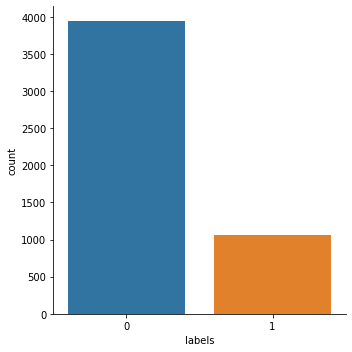

In [81]:
#It is important to get the features that the centroids have the most significant variance.
# So, we can see how each feature is important for the segmentation's composition
import seaborn as sns
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(numerical_features)
labels = kmeans.labels_

df['labels'] = labels
sns.catplot(x='labels', kind='count', data=df)


In [82]:
#It is important to get the features that the centroids have the most significant variance.
# So, we can see how each feature is important for the segmentation's composition
centroids = kmeans.cluster_centers_
print(centroids)

[[-2.49634356e-03  1.77477911e-04 -2.81770323e-04 -5.27948328e-02
  -5.22399917e-02 -6.91799341e-02]
 [ 9.25502349e-03 -6.57987251e-04  1.04464426e-03  1.95733242e-01
   1.93676206e-01  2.56479887e-01]]


In [83]:
max = len(centroids[0])
for i in range(max):
    print(numerical_features.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

cc_count 
0.0000
from_count 
0.0000
to_count 
0.0000
numbers_in_subject 
0.0154
subject_size 
0.0151
subject_special_chars 
0.0265


<function matplotlib.pyplot.show(close=None, block=None)>

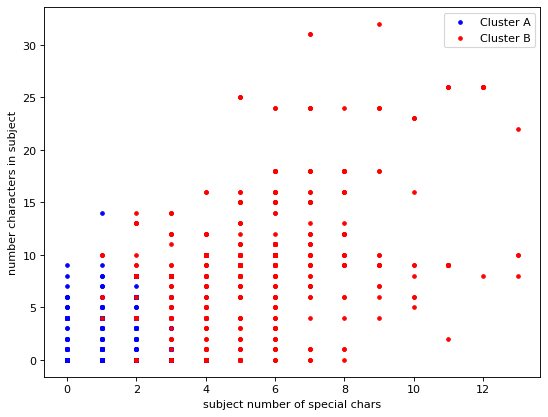

In [84]:
df_0 = df[df['labels'] == 0]
df_1 = df[df['labels'] == 1]

<function matplotlib.pyplot.show(close=None, block=None)>

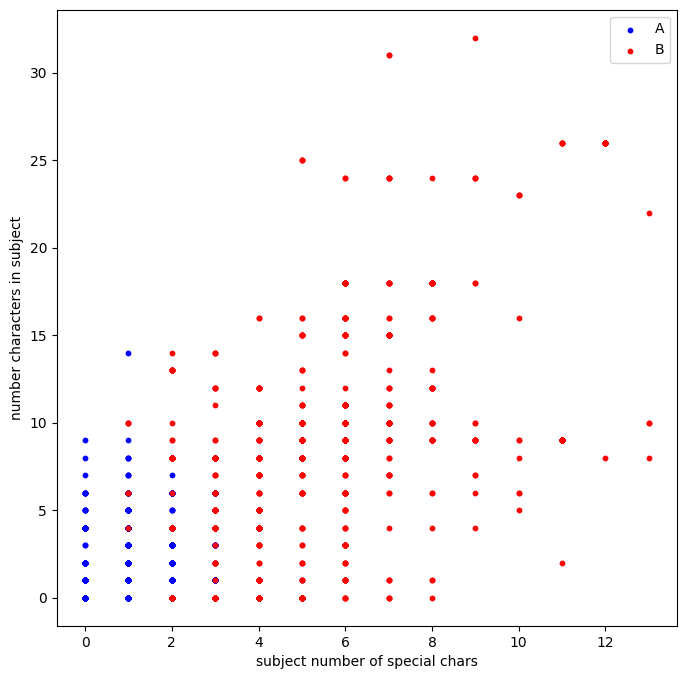

In [86]:
plt.figure(figsize=(8, 8))
plt.scatter(df_0['subject_special_chars'], df_0['numbers_in_subject'], c='blue', s=10, label='A')
plt.scatter(df_1['subject_special_chars'], df_1['numbers_in_subject'], c='red', s=10, label='B')
plt.xlabel('subject number of special chars')
plt.ylabel('number characters in subject')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

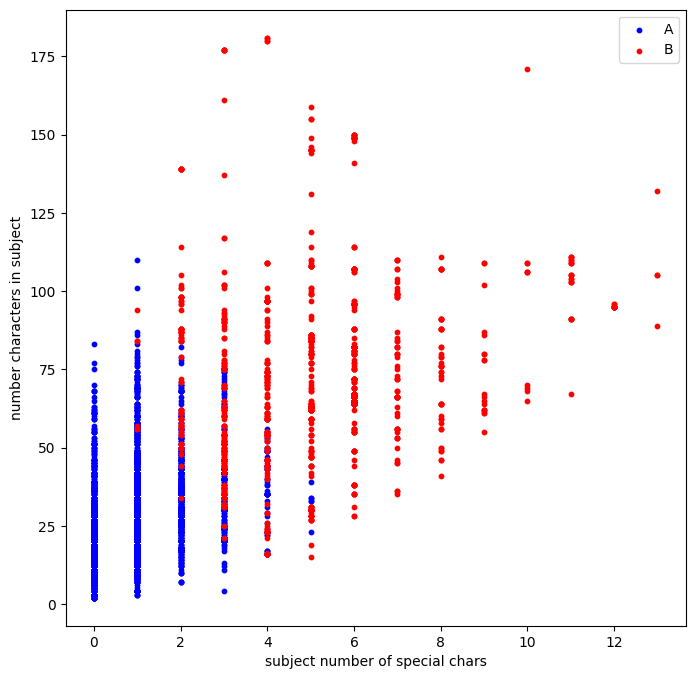

In [87]:
plt.figure(figsize=(8, 8))
plt.scatter(df_0['subject_special_chars'], df_0['subject_size'], c='blue', s=10, label='A')
plt.scatter(df_1['subject_special_chars'], df_1['subject_size'], c='red', s=10, label='B')
plt.xlabel('subject number of special chars')
plt.ylabel('number characters in subject')
plt.legend()
plt.show